# Task 1: Simple Linear Regression

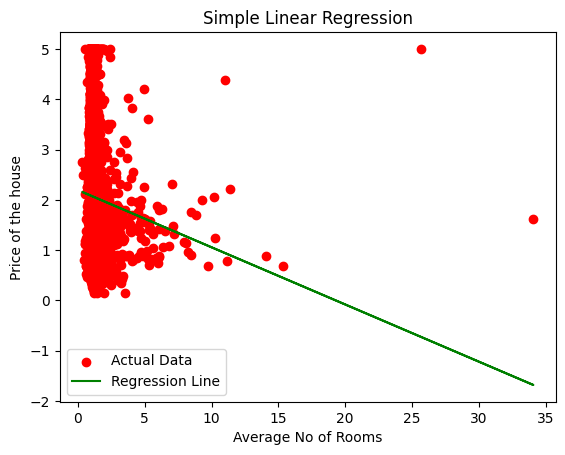

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = fetch_california_housing()
X = data.data[:, [3]] 
Y = data.target


model = LinearRegression()
model.fit(X, Y)


plt.scatter(X, Y, color='red',label='Actual Data')
plt.plot(X, model.predict(X), color='Green',label='Regression Line')
plt.xlabel('Average No of Rooms')
plt.ylabel('Price of the house')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


# Task 2: Multiple Linear Regression

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data.data  
Y = data.target

model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(X)


r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficients:", model.coef_)

R-squared: 0.606232685199805
Mean Squared Error(MSE): 0.5243209861846072
Root Mean Squared Error (RMSE): 0.7241001216576387
Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


# Task 3: Feature Scaling and Normalization 

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)


model.fit(X_train, Y_train)
print("R2 without scaling:", model.score(X_test, Y_test))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, Y_train)
print("R2 with scaling:", model.score(X_test_scaled, Y_test))


R2 without scaling: 0.5911695436410462
R2 with scaling: 0.5911695436410489


# Task 4: Model Interpretation

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


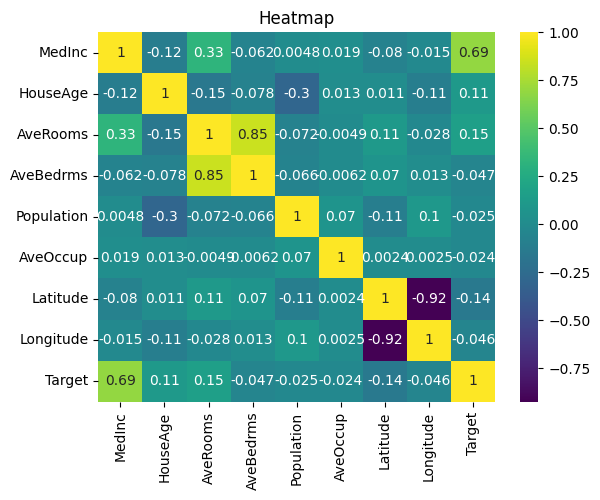

In [24]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target


corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Heatmap")

print(corr['Target'].sort_values(ascending=False))


# Task 5: Binary Classification with Logistic Regression

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


data = load_breast_cancer()
X = data.data
Y = data.target


model = LogisticRegression(max_iter=10000)
model.fit(X, Y)
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]


print("Accuracy:", accuracy_score(Y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y, y_pred))
print("Classification Report:\n", classification_report(Y, y_pred))
print("ROC AUC Score:", roc_auc_score(Y, y_prob))

Accuracy: 0.9578207381370826
Confusion Matrix:
 [[197  15]
 [  9 348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

ROC AUC Score: 0.9946752285819989


# Task 6: Threshold Tuning and Probability Interpretation

Accuracy: 0.9578207381370826
Confusion Matrix:
 [[197  15]
 [  9 348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

ROC AUC Score: 0.9946752285819989

Threshold = 0.3
F1 Score: 0.9643
Confusion Matrix:
[[192  20]
 [  6 351]]

Threshold = 0.5
F1 Score: 0.9667
Confusion Matrix:
[[197  15]
 [  9 348]]

Threshold = 0.7
F1 Score: 0.9673
Confusion Matrix:
[[206   6]
 [ 17 340]]


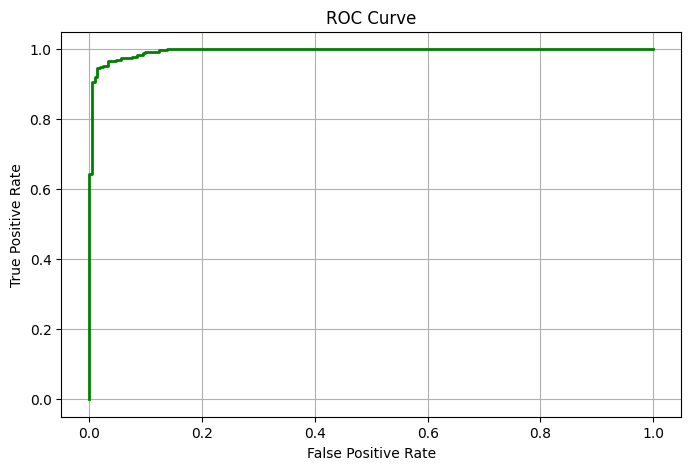

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
Y = data.target

model = LogisticRegression(max_iter=10000)
model.fit(X, Y)
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

print("Accuracy:", accuracy_score(Y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y, y_pred))
print("Classification Report:\n", classification_report(Y, y_pred))
print("ROC AUC Score:", roc_auc_score(Y, y_prob))

thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    cm = confusion_matrix(Y, preds)
    f1 = f1_score(Y, preds)
    print(f"\nThreshold = {t}")
    print("F1 Score:", round(f1, 4))
    print("Confusion Matrix:")
    print(cm)

fpr, tpr, _ = roc_curve(Y, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='green', linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()


# Task 7: Multiclass Classification

In [23]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data.target

model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(X, Y)

y_pred = model.predict(X)
print("Classification Report:\n", classification_report(Y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# What are the assumptions of linear regression?

In [ ]:
# ->The relationship between features and target is linear.
# ->Independence of errors.
# ->Normal distribution of residuals.
# ->No multicollinearity among independent variables.

# When should you use logistic regression instead of linear regression?

In [ ]:
# You should use logistic regression when your output (target) is a category — like "yes or no", "spam or not spam", etc. 
# Linear regression is for numbers, while logistic regression is better for predicting categories.

# What is the interpretation of coefficients in logistic regression?

In [ ]:
# Coefficients represent the log-odds change in the outcome for a one-unit change in the predictor.
# Positive coefficient → increase in probability of positive class

# What is the difference between sigmoid and softmax functions?

In [ ]:
# The sigmoid function is used when you have two classes (binary classification). It gives a number between 0 and 1 — like saying “there’s a 70% chance it’s class A.”
# The softmax function is used for more than two classes. It gives a list of probabilities that all add up to 100%, telling you how likely the input is to belong to each class.

# Why is R-squared not suitable for evaluating logistic regression models?

In [ ]:
# R-squared works well for linear regression where the goal is to predict a number. 
# But in logistic regression, we’re predicting categories or probabilities, not actual numbers. So accuracy, precision, recall, or AUC are better ways to measure how well it’s working.